# Data Cleaning

## Import Libraries

In [54]:
# Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numerize import numerize
import geopandas as gpd

## Import Dataframe

In [56]:
# Import dataframe
kp = pd.read_csv('https://raw.githubusercontent.com/Fery-K/Capstone_Project_TETRIS/master/Datasets/kredit_provinsi.csv')
k_mk = pd.read_csv('https://raw.githubusercontent.com/Fery-K/Capstone_Project_TETRIS/master/Datasets/kredit_modal_kerja_bank.csv')
k_i = pd.read_csv('https://raw.githubusercontent.com/Fery-K/Capstone_Project_TETRIS/master/Datasets/kredit_investasi_bank.csv')
k_k = pd.read_csv('https://raw.githubusercontent.com/Fery-K/Capstone_Project_TETRIS/master/Datasets/kredit_konsumsi_bank.csv')
pdrb = pd.read_csv('https://raw.githubusercontent.com/Fery-K/Capstone_Project_TETRIS/master/Datasets/laju_pdrb.csv')

## Check Missing Value

In [21]:
print(kp.isna().sum())
print(k_mk.isna().sum())
print(k_i.isna().sum())
print(k_k.isna().sum())
print(pdrb.isna().sum())

no          0
provinsi    0
tahun       0
kredit      0
dtype: int64
bank      0
tahun     0
kredit    0
dtype: int64
bank      0
tahun     0
kredit    0
dtype: int64
bank      0
tahun     0
kredit    0
dtype: int64
no            0
provinsi      0
tahun_2011    1
tahun_2012    1
tahun_2013    1
tahun_2014    0
tahun_2015    1
tahun_2016    0
tahun_2017    0
tahun_2018    0
tahun_2019    0
tahun_2020    0
tahun_2021    0
tahun_2022    0
dtype: int64


## Detect Missing Value Location

In [22]:
col_pdrb = pdrb.columns.values.tolist()
for i in range(len(col_pdrb)):
    if pdrb[col_pdrb[i]].isna().sum() == 1:
        for j in range(pdrb.shape[0]):
            if pdrb[col_pdrb[i]].isna().loc[j]:
                print(f"Data hilang:\n[tahun,provinsi]: {[col_pdrb[i],pdrb['provinsi'].loc[j]]}")

Data hilang:
[tahun,provinsi]: ['tahun_2011', 'Kalimantan Utara']
Data hilang:
[tahun,provinsi]: ['tahun_2012', 'Kalimantan Utara']
Data hilang:
[tahun,provinsi]: ['tahun_2013', 'Kalimantan Utara']
Data hilang:
[tahun,provinsi]: ['tahun_2015', 'Nasional']


## Impute Missing Value

In [23]:
pdrb.loc[33, 'tahun_2011'], pdrb.loc[33, 'tahun_2012'], pdrb.loc[33, 'tahun_2013'] = 0, 0, 0
pdrb.loc[34, 'tahun_2015'] = pdrb.transpose()[34].loc[col_pdrb[2:]].mean()

# Data Exploration and Visualization

In [18]:
# Lookup dataframe
print(kp.head())
print(pdrb.head())
print(k_k.head())
print(k_i.head())
print(k_mk.head())

   no        provinsi  tahun     kredit
0   1            Aceh   2002   1568.500
1   2  Sumatera Utara   2002  10058.580
2   3  Sumatera Barat   2002   3747.333
3   4            Riau   2002   8048.167
4   5           Jambi   2002   2581.833
   no        provinsi  tahun_2011  tahun_2012  tahun_2013  tahun_2014  \
0   1            Aceh        3.28        3.85        2.61        1.55   
1   2  Sumatera Utara        6.66        6.45        6.07        5.23   
2   3  Sumatera Barat        6.34        6.31        6.08        5.88   
3   4            Riau        5.57        3.76        2.48        2.71   
4   5           Jambi        7.86        7.03        6.84        7.36   

   tahun_2015  tahun_2016  tahun_2017  tahun_2018  tahun_2019  tahun_2020  \
0       -0.73        3.29        4.18        4.61        4.14       -0.37   
1        5.10        5.18        5.12        5.18        5.22       -1.07   
2        5.53        5.27        5.30        5.14        5.01       -1.61   
3        0.22

## Visualisasi data kredit menurut provinsi

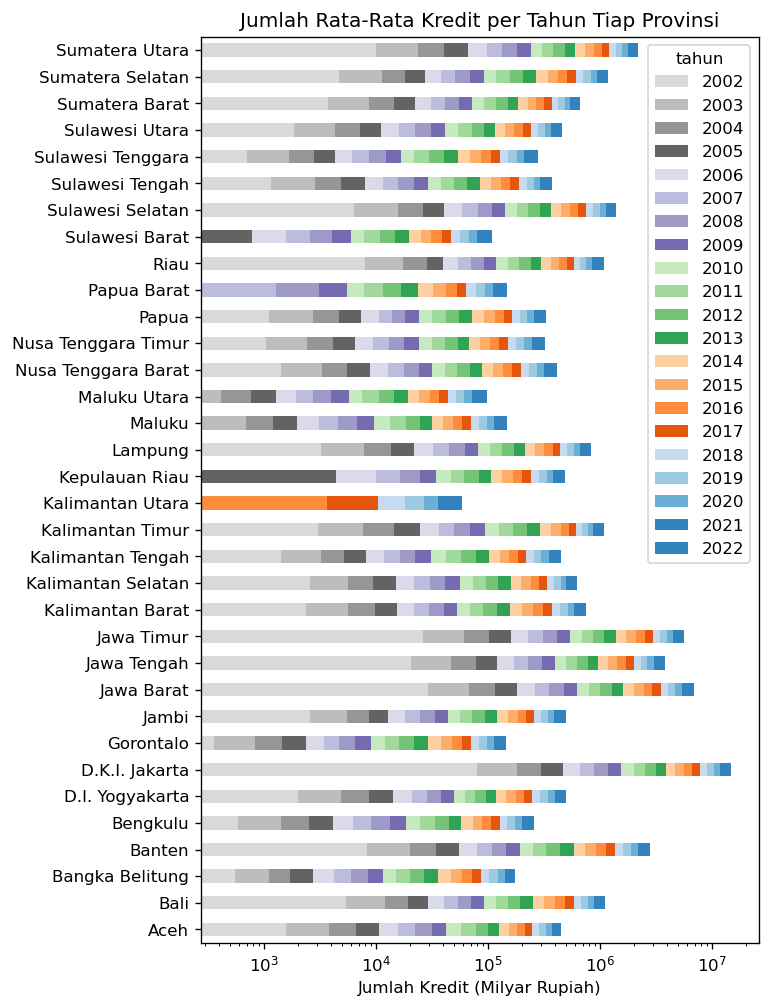

In [29]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = 6, 10

kp_pivot = kp.pivot(index='provinsi', columns='tahun', values='kredit').reset_index()

kp_pivot.plot(
    x='provinsi',
    kind='barh',
    stacked=True,
    colormap='tab20c_r'
)

plt.title('Jumlah Rata-Rata Kredit per Tahun Tiap Provinsi')
plt.xlabel('Jumlah Kredit (Milyar Rupiah)')
plt.ylabel('')
plt.xscale('log')
plt.show()

## Visualisasi Hubungan Kredit dan PDRB

In [62]:
# Load the geopandas map of Indonesia
dg = gpd.read_file(r'C:\Users\Fery\Desktop\TETRIS Data Analytics\Capstone Project\batas_provinsi.shp')

# Merge the map with the "prdb" DataFrame based on the 'Provinsi' column
merged_data = dg.merge(pdrb, left_on='name', right_on='Provinsi')

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(column='PDRB_Per_Capita', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title("PDRB Per Capita Heatmap by Province")
plt.show()








DriverError: Unable to open C:\Users\Fery\Desktop\TETRIS Data Analytics\Capstone Project\batas_provinsi.shx or C:\Users\Fery\Desktop\TETRIS Data Analytics\Capstone Project\batas_provinsi.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

## Visualisasi Kredit Berdasarkan Jenis Penggunaan

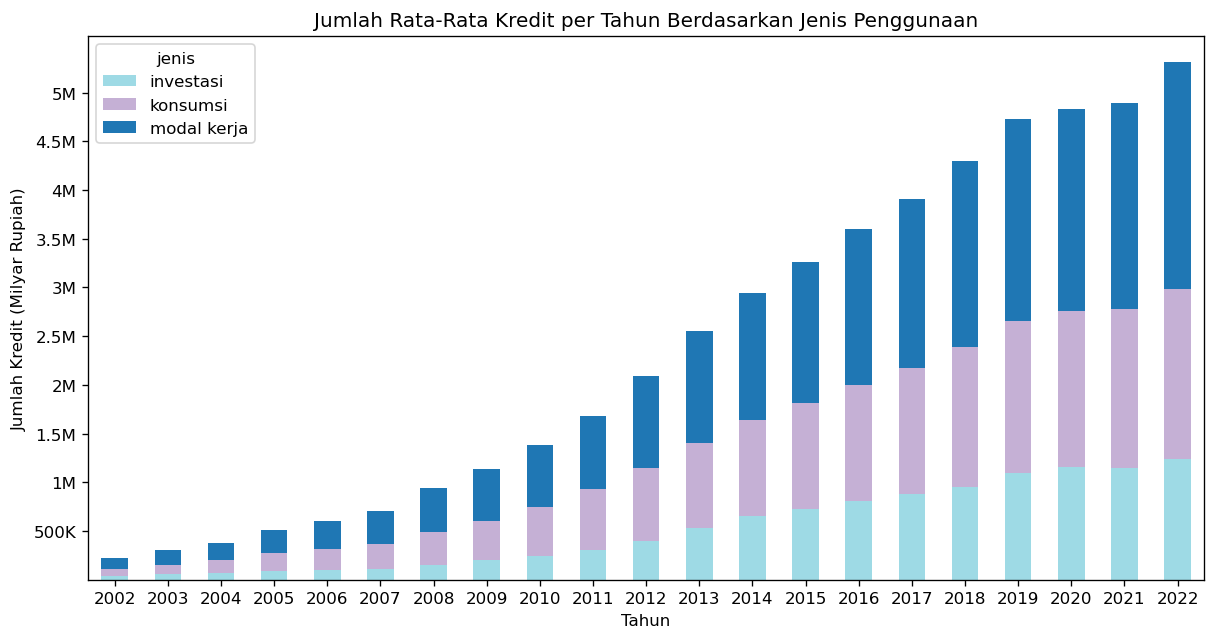

In [53]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = 12, 6

k_k_tahun = k_k.groupby('tahun').sum()
k_i_tahun = k_i.groupby('tahun').sum()
k_mk_tahun = k_mk.groupby('tahun').sum()
k_k_tahun['jenis'] = ['konsumsi' for i in range(k_k_tahun.shape[0])]
k_i_tahun['jenis'] = ['investasi' for j in range(k_i_tahun.shape[0])]
k_mk_tahun['jenis'] = ['modal kerja' for k in range(k_mk_tahun.shape[0])]

k_jenis = pd.concat([k_k_tahun, k_i_tahun, k_mk_tahun]).reset_index()
k_pivot = k_jenis.pivot(index='tahun', columns='jenis', values='kredit').reset_index()

k_pivot.plot(
    x='tahun',
    kind='bar',
    stacked=True,
    colormap='tab20_r'
)
# k_pivot.plot(
#     x='tahun',
#     kind='line',
#     stacked=True,
#     colormap='tab20_r'
# )

x_ax = [0.5*i*(10**6) for i in range(1, 11)]

plt.title('Jumlah Rata-Rata Kredit per Tahun Berdasarkan Jenis Penggunaan')
plt.xticks(rotation=0)
plt.yticks(x_ax, [numerize.numerize(n) for n in x_ax])
plt.ylabel('Jumlah Kredit (Milyar Rupiah)')
plt.xlabel('Tahun')
plt.show()